# Infarsight Refund Process Analysis

### About the Dataset



### Download necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load Dataset

In [3]:
df = pd.read_csv('INFARSIGHT.csv')
df.head()

/var/folders/_1/mqwv2bd1667cwmfvh2v0m2sm0000gn/T/ipykernel_92971/1182511326.py:1: DtypeWarning: Columns (6,7,8,46,47,48,49,52,62,64,65,67,68,69,72,93,97,99,102,104,113,127) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('INFARSIGHT.csv')


,Title,Submission Date,Reservation Number,Form Type,Process ID,Ticket Status,Escalation Type,Escalation Reason,Escalation Comments,Instructions for Accounting,...,Total Age,ManualRouting,ZeroDepositFlag,FlightPNRs,SID,Last Queue,Attachments,Modified,Sort Priority 3,What location are you with
0,Vendor Refund Request,1/26/2021 21:00,T684T004,Online Web Form,26588,Closed,NaN,NaN,NaN,NaN,...,49,No,False,SGSAir|SQNKT9,Southwest,NaN,1,10/5/2021 1:27,NaN,NaN
1,Vendor Refund Request,1/26/2021 21:00,A1D100CJ,Online Web Form,26589,Closed,NaN,NaN,NaN,We only paid deposit and will NOT be paying an...,...,104,No,False,SabreWSAir|TRWWGK,SABRE,NaN,1,10/5/2021 2:00,NaN,NaN
2,Vendor Refund Request,1/27/2021 10:30,3W2000AX,Online Web Form,26590,Closed,NaN,NaN,NaN,The wedding we were to attend was cancelled du...,...,38,No,False,NaN,6MA,NaN,1,10/5/2021 2:00,NaN,NaN
3,Vendor Refund Request,1/27/2021 17:32,FM5200CJ,Online Web Form,26591,Closed,NaN,NaN,NaN,NaN,...,103,No,False,SabreWSAir|BJWDSQ,SABRE,NaN,1,10/5/2021 2:00,NaN,NaN
4,Vendor Refund Request,1/26/2021 22:00,5EW83204,Online Web Form,26592,Closed,NaN,NaN,NaN,clients used southwest travel funds as payment...,...,12,No,False,SGSAir|3PQUJB,Southwest,NaN,1,10/5/2021 2:00,NaN,NaN


### Data Cleaning and Wrangling

In [4]:
print(df.info())  # Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 137 entries, Title to What location are you with
dtypes: float64(33), int64(3), object(101)
memory usage: 31.4+ MB
None


In [5]:
print(df.shape) # Checking no. of rows and columns

(30000, 137)


In [6]:
print(df.columns.tolist()) # Listing columns in dataset

['Title', 'Submission Date', 'Reservation Number', 'Form Type', 'Process ID', 'Ticket Status', 'Escalation Type', 'Escalation Reason', 'Escalation Comments', 'Instructions for Accounting', 'Email Subject', 'Brand', 'Priority Level', 'Departure Date', 'Booking Date', 'Cancelled Date', 'Is this RNRL', 'Passenger Name', 'Passenger Email', 'ALG Staff Email Address', 'Agency Name', 'TA Email', 'TA Phone Number', 'Origin', 'Destination', 'Air Type', 'Is Travel Protection Being Used', 'Travel Protection Type', 'Payment Type', 'Email Attachment', 'Total Amount to be Refunded', 'Requesting Travel Credit Instead of form of Payment', 'Group ID', 'TA Account Number', 'Voucher Number_If applicable', 'Credit Card Type_Field 1', 'Last 4 Digits of Credit Card_Field 1', 'Amount Refunded to Credit Card_Field 1', 'Credit Card Type_Field 2', 'Last 4 Digits of Credit Card_Field 2', 'Amount Refunded to Credit Card_Field 2', 'Credit Card Type_Field 3', 'Last 4 Digits of Credit Card_Field 3', 'Amount Refunded

In [7]:
# Remove columns with null values greater than 40%
missing_values = df.isnull().mean() * 100
columns_to_drop = missing_values[missing_values > 40].index
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,Title,Submission Date,Reservation Number,Form Type,Process ID,Ticket Status,Instructions for Accounting,Email Subject,Priority Level,Departure Date,...,Created By,Modified By,FromMigration,Total Age,ManualRouting,ZeroDepositFlag,FlightPNRs,SID,Attachments,Modified
0,Vendor Refund Request,1/26/2021 21:00,T684T004,Online Web Form,26588,Closed,NaN,Vendor Refund Request,Priority 01,2/9/2021,...,accountingworkflowsvc,accountingworkflowsvc,Yes,49,No,False,SGSAir|SQNKT9,Southwest,1,10/5/2021 1:27
1,Vendor Refund Request,1/26/2021 21:00,A1D100CJ,Online Web Form,26589,Closed,We only paid deposit and will NOT be paying an...,Vendor Refund Request,Priority 06,2/19/2021,...,accountingworkflowsvc,accountingworkflowsvc,Yes,104,No,False,SabreWSAir|TRWWGK,SABRE,1,10/5/2021 2:00
2,Vendor Refund Request,1/27/2021 10:30,3W2000AX,Online Web Form,26590,Closed,The wedding we were to attend was cancelled du...,Vendor Refund Request,Priority 06,3/15/2021,...,accountingworkflowsvc,accountingworkflowsvc,Yes,38,No,False,NaN,6MA,1,10/5/2021 2:00
3,Vendor Refund Request,1/27/2021 17:32,FM5200CJ,Online Web Form,26591,Closed,NaN,Vendor Refund Request,Priority 06,3/17/2021,...,accountingworkflowsvc,accountingworkflowsvc,Yes,103,No,False,SabreWSAir|BJWDSQ,SABRE,1,10/5/2021 2:00
4,Vendor Refund Request,1/26/2021 22:00,5EW83204,Online Web Form,26592,Closed,clients used southwest travel funds as payment...,Vendor Refund Request,Priority 06,6/14/2021,...,accountingworkflowsvc,accountingworkflowsvc,Yes,12,No,False,SGSAir|3PQUJB,Southwest,1,10/5/2021 2:00


In [8]:
print(df_cleaned.shape) # Checking no. of rows and columns in updated dataset

(30000, 47)


In [9]:
print(df_cleaned.columns.tolist()) # Listing columns in updated dataset

['Title', 'Submission Date', 'Reservation Number', 'Form Type', 'Process ID', 'Ticket Status', 'Instructions for Accounting', 'Email Subject', 'Priority Level', 'Departure Date', 'Booking Date', 'Cancelled Date', 'Passenger Name', 'Passenger Email', 'Origin', 'Destination', 'Air Type', 'Current Res Total', 'Assigned to Text field', 'Queue', 'Air Refund', 'Last DB Update', 'FIT_Group', 'Res Status', 'Sched Type', 'CI_CW Flag', 'Refund Calculation Flag', 'Chargeback Code_D9', 'Check Needed', 'NN_NQ', 'Paid Non-Cash', 'Paid with Transfer', 'SBU', 'ID', 'Created', 'Completed On', 'Assignee FirstName', 'Created By', 'Modified By', 'FromMigration', 'Total Age', 'ManualRouting', 'ZeroDepositFlag', 'FlightPNRs', 'SID', 'Attachments', 'Modified']


In [10]:
# Dropping columns unnecessary for analysis
df_cleaned = df_cleaned.drop(columns = [ 'Instructions for Accounting', 'Email Subject', 'Assigned to Text field', 'Queue', 'Air Refund', 'Last DB Update', 'FIT_Group', 'Res Status', 'Sched Type', 'CI_CW Flag', 'Refund Calculation Flag', 'Chargeback Code_D9', 'Check Needed', 'NN_NQ', 'Paid Non-Cash', 'Paid with Transfer', 'SBU', 'ID', 'Created', 'Completed On', 'Assignee FirstName', 'Created By', 'Modified By', 'FromMigration', 'ManualRouting', 'ZeroDepositFlag', 'FlightPNRs', 'SID', 'Attachments', 'Modified'])


In [11]:
# Renaming column
df_cleaned.rename(columns={'Current Res Total': 'Reservation Total'}, inplace=True)

In [12]:
# For the remaining columns, fill missing values:
# Fill categorical columns with mode and numerical columns with median
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':  # Categorical columns
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)
    else:  # Numerical columns
        df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)

# Step 2: Standardize Data Types
# Identify columns that should be converted to date-time
date_columns = ['Submission Date', 'Cancelled Date', 'Booking Date', 'Departure Date']

# Convert these columns to date-time format
for col in date_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')

df_cleaned.head()

,Title,Submission Date,Reservation Number,Form Type,Process ID,Ticket Status,Priority Level,Departure Date,Booking Date,Cancelled Date,Passenger Name,Passenger Email,Origin,Destination,Air Type,Reservation Total,Total Age
0,Vendor Refund Request,2021-01-26 21:00:00,T684T004,Online Web Form,26588,Closed,Priority 01,2021-02-09,2020-11-27,2020-12-25,Wisehart/Lawatha J,lawatha@aol.com,TPA,LAS,True,540.26,49
1,Vendor Refund Request,2021-01-26 21:00:00,A1D100CJ,Online Web Form,26589,Closed,Priority 06,2021-02-19,2020-12-26,2021-01-28,Ramaniuk/Aliaksandr Siarheiavich,kerry.ramaniuk@gmail.com,MCO,CUN,True,149.74,104
2,Vendor Refund Request,2021-01-27 10:30:00,3W2000AX,Online Web Form,26590,Closed,Priority 06,2021-03-15,2020-08-30,2021-01-28,Laubach/Anthony,wxnerd@gmail.com,XXX,HNL,False,189.98,38
3,Vendor Refund Request,2021-01-27 17:32:00,FM5200CJ,Online Web Form,26591,Closed,Priority 06,2021-03-17,2021-01-28,2021-01-28,Collier/Jessica,jessicaleegraham@gmail.com,DFW,CUN,True,"1,067.60",103
4,Vendor Refund Request,2021-01-26 22:00:00,5EW83204,Online Web Form,26592,Closed,Priority 06,2021-06-14,2021-01-20,2021-01-21,YBARRA/Jeremy RAY,ybarra.jeremy@gmail.com,DAL,SJD,True,0,12


In [13]:
df_cleaned.info()  # Check data types and non-null counts for updated dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               30000 non-null  object        
 1   Submission Date     30000 non-null  datetime64[ns]
 2   Reservation Number  30000 non-null  object        
 3   Form Type           30000 non-null  object        
 4   Process ID          30000 non-null  int64         
 5   Ticket Status       30000 non-null  object        
 6   Priority Level      30000 non-null  object        
 7   Departure Date      30000 non-null  datetime64[ns]
 8   Booking Date        30000 non-null  datetime64[ns]
 9   Cancelled Date      30000 non-null  datetime64[ns]
 10  Passenger Name      30000 non-null  object        
 11  Passenger Email     30000 non-null  object        
 12  Origin              30000 non-null  object        
 13  Destination         30000 non-null  object    

In [14]:
df_cleaned.drop_duplicates(inplace=True) # Removing duplicates

### Exploratory Data Analysis

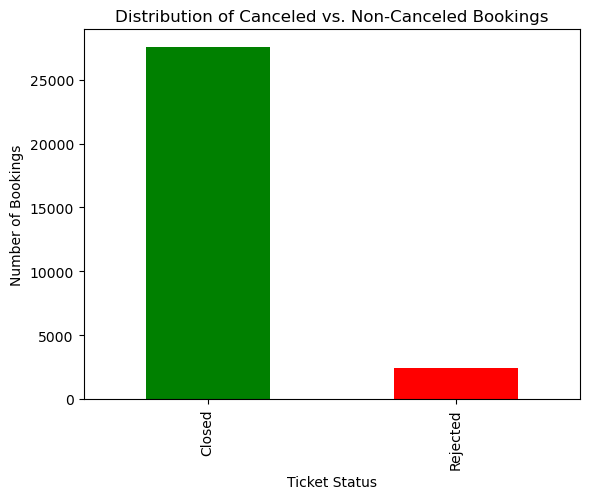

In [14]:
# Count the distribution of canceled vs. non-canceled bookings
df_cleaned['Ticket Status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Distribution of Canceled vs. Non-Canceled Bookings")
plt.xlabel("Ticket Status")
plt.ylabel("Number of Bookings")
plt.show()

In [15]:
#Extracting month and year from date column
df_cleaned['Cancelled Month'] = df_cleaned['Cancelled Date'].dt.month
df_cleaned['Cancelled Year'] = df_cleaned['Cancelled Date'].dt.year

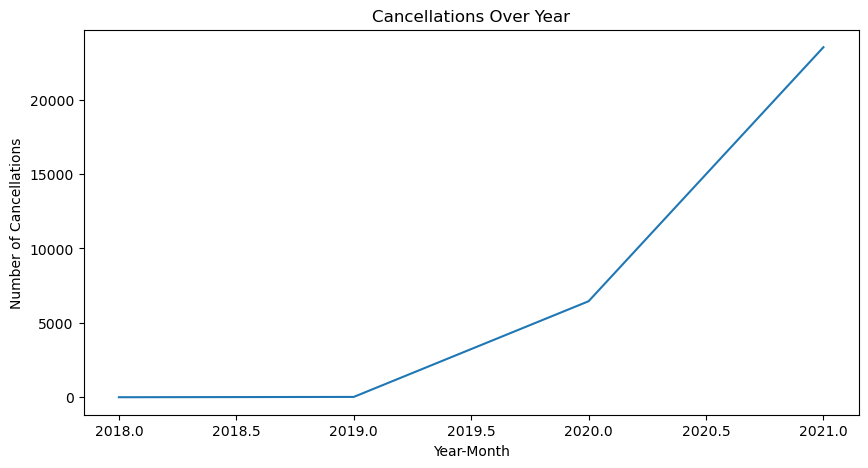

In [16]:
# Group by year and month, and plot the cancellations
cancellations_by_month = df_cleaned.groupby(['Cancelled Year']).size()

# Plot cancellations over time
cancellations_by_month.plot(kind='line', figsize=(10,5))
plt.title("Cancellations Over Year")
plt.xlabel("Year-Month")
plt.ylabel("Number of Cancellations")
plt.show()

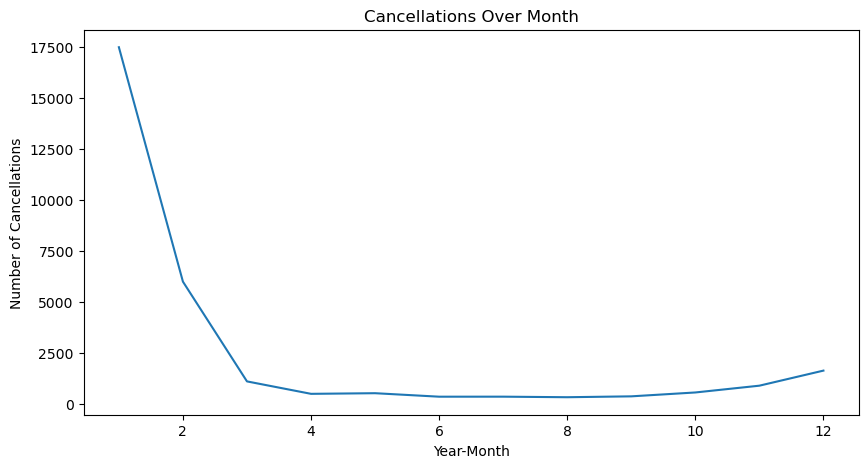

In [17]:
# Group by year and month, and plot the cancellations
cancellations_by_month = df_cleaned.groupby(['Cancelled Month']).size()

# Plot cancellations over time
cancellations_by_month.plot(kind='line', figsize=(10,5))
plt.title("Cancellations Over Month")
plt.xlabel("Year-Month")
plt.ylabel("Number of Cancellations")
plt.show()

#### Note: Maximum number of cancellations were observed in 2020 during the pandemic in the months of December - February

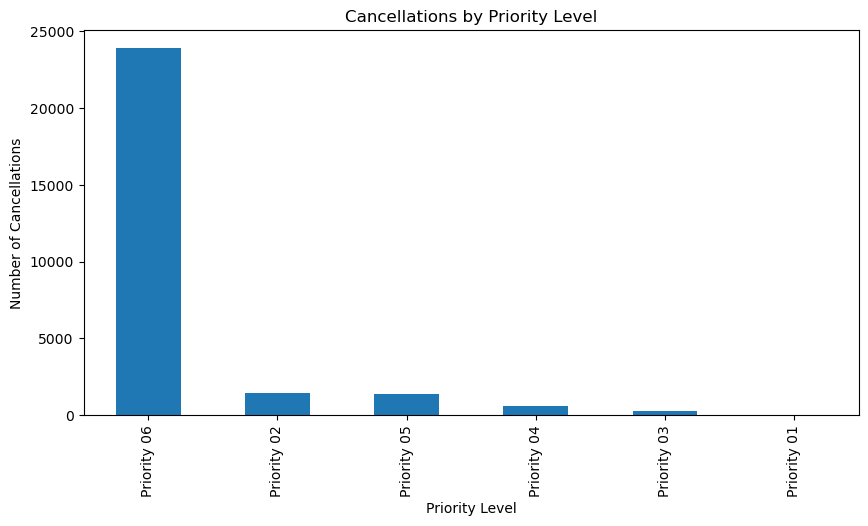

In [18]:
# Cancellations by destination
df_cleaned[df_cleaned['Ticket Status'] == 'Closed']['Priority Level'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Cancellations by Priority Level")
plt.xlabel("Priority Level")
plt.ylabel("Number of Cancellations")
plt.show()

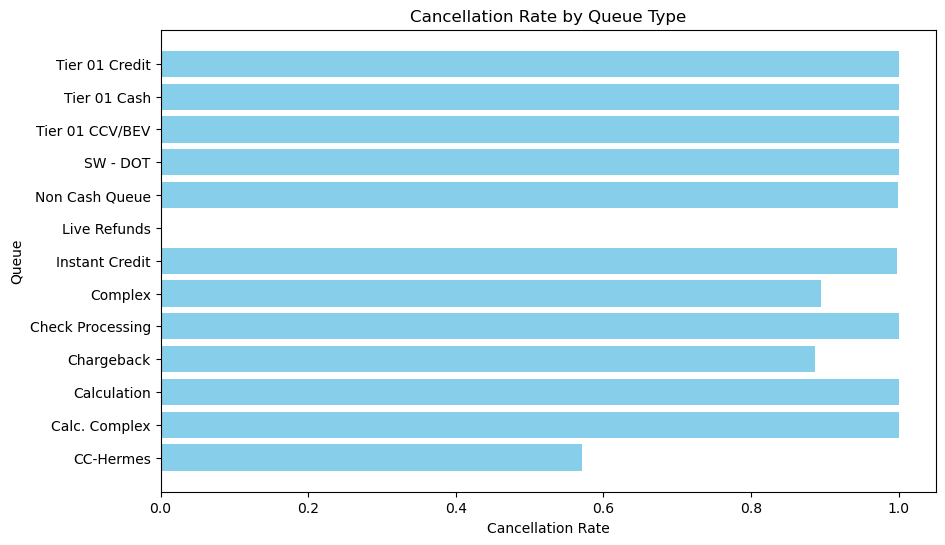

In [19]:
# Step 1: Create a binary column for cancellations
# Assuming 'Cancelled Date' has a date if canceled, else NaN
df['Is_Canceled'] = df['Cancelled Date'].notna().astype(int)

# Step 2: Calculate cancellation rate by queue
queue_cancellation_rate = df.groupby('Queue')['Is_Canceled'].mean().reset_index()
queue_cancellation_rate.columns = ['Queue', 'Cancellation Rate']

# Step 3: Visualize the cancellation rates by queue
plt.figure(figsize=(10, 6))
plt.barh(queue_cancellation_rate['Queue'], queue_cancellation_rate['Cancellation Rate'], color='skyblue')
plt.xlabel('Cancellation Rate')
plt.ylabel('Queue')
plt.title('Cancellation Rate by Queue Type')
plt.show()

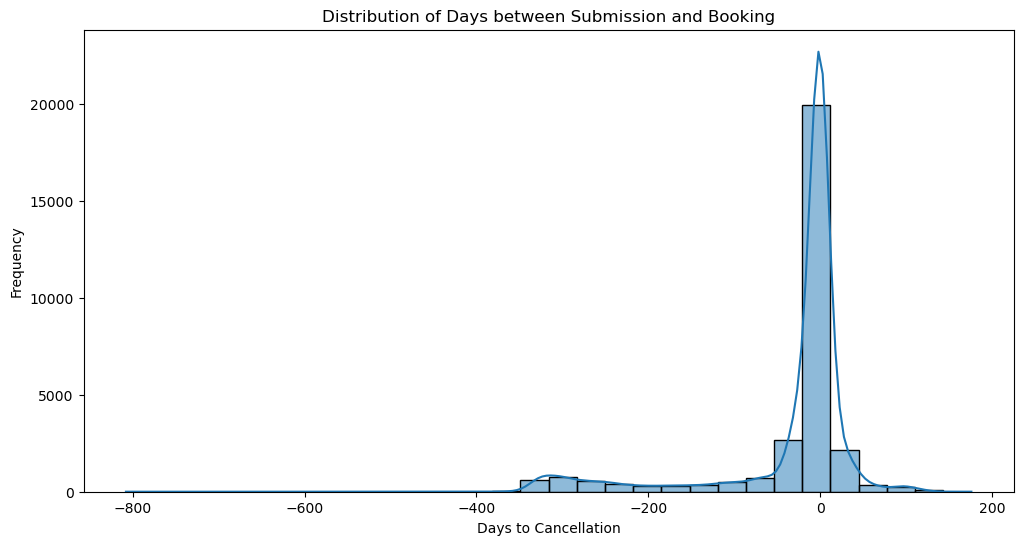

In [20]:
# Convert date columns to datetime format
df_cleaned['Submission Date'] = pd.to_datetime(df_cleaned['Submission Date'])
df_cleaned['Cancelled Date'] = pd.to_datetime(df_cleaned['Cancelled Date'])

# Calculate the difference in days between Submission Date and Cancelled Date
df_cleaned['Days to Cancellation'] = (df_cleaned['Cancelled Date'] - df_cleaned['Submission Date']).dt.days

# Plot the trend in Days to Cancellation over time
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Days to Cancellation'], kde=True, bins=30)
plt.title('Distribution of Days between Submission and Booking')
plt.xlabel('Days to Cancellation')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Filter for tickets that are either 'Closed' or 'Rejected'
# You may want to choose which one you are interested in or include both
cancellation_counts = df_cleaned[df_cleaned['Ticket Status'].isin(['Closed', 'Rejected'])].groupby('Form Type').size().reset_index(name='Cancellations')

# Display the resulting DataFrame
print(cancellation_counts)


                            Form Type  Cancellations
0  Accounting - Adjustment and Refund            321
1                 Accounting - Refund           6299
2   Accounting - Refund – WN Dot Only            308
3            Cancel for Travel Credit           3547
4                     Online Web Form           7342
5     TA Credit for Instant Rebooking           2164
6               Vax Fund Request Form           8268
7             Vax Reservation Changes           1751


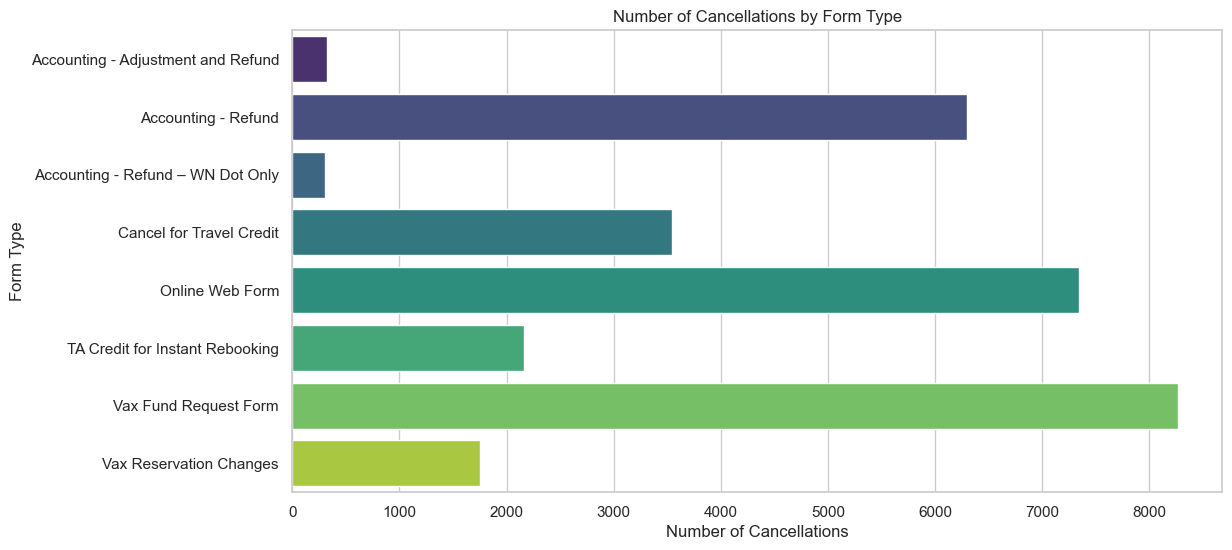

In [22]:
# Set the aesthetics for the plot
sns.set(style='whitegrid')

# Create a bar plot using the cancellation_counts DataFrame
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancellations', y='Form Type', data=cancellation_counts, palette='viridis')

# Set titles and labels
plt.title('Number of Cancellations by Form Type')
plt.xlabel('Number of Cancellations')
plt.ylabel('Form Type')

# Show the plot
plt.show()